# Curvas de Aprendizado

In [1]:
from aurelio.plotter import collect, collect_zip
import os
import pandas as pd
import seaborn as sns

In [2]:
exps = [
    "with_elmo-n:n-glove_100",
    "with_elmo-n:1-glove_100",
    "with_elmo-1:n-glove_100",
    "with_elmo-1:1-glove_100",
    "with_elmo-n:n-glove_0",
    "with_elmo-n:1-glove_0",
    "with_elmo-1:n-glove_0",
    "with_elmo-1:1-glove_0",
    "no_elmo-n:n-glove_0",
    "no_elmo-n:n-glove_100",
]

dfs = {}
for exp in exps:
    if ".zip" not in exp:
        path = "{}/metrics/{}".format(os.getcwd(), exp)
        dfs[exp] = pd.DataFrame.from_records(collect(path, exp))
    else:
        dfs[exp] = pd.DataFrame.from_records(collect_zip(exp, exp))
#dfs["metrics_kfold_dev_reduced_elmo.zip"].head()

In [3]:
def plot_perc(df, metric, hue="name"):
    p = sns.lineplot(x="perc", y=metric, data=df, hue=hue)
    p.set_xlabel("% of train")
    p.set_ylabel("F1")
    p.set(xlim=(0.1,1))
    return p

def plot_perc_f1_em(df):
    df = df[["perc", "best_validation_f1", "best_validation_em"]]
    df = pd.melt(df, id_vars=["perc"], var_name="Metric", value_name="score")
    df["Metric"] = ["F1" if _type == "best_validation_f1" else "EM" for _type in df["Metric"]]

    p = sns.lineplot(data=df, x="perc", y="score", hue="Metric")
    p.set_xlabel("% of train")
    p.set_ylabel("Score")
    p.set(xlim=(0.1,1))
    return p

## Melhor Modelo

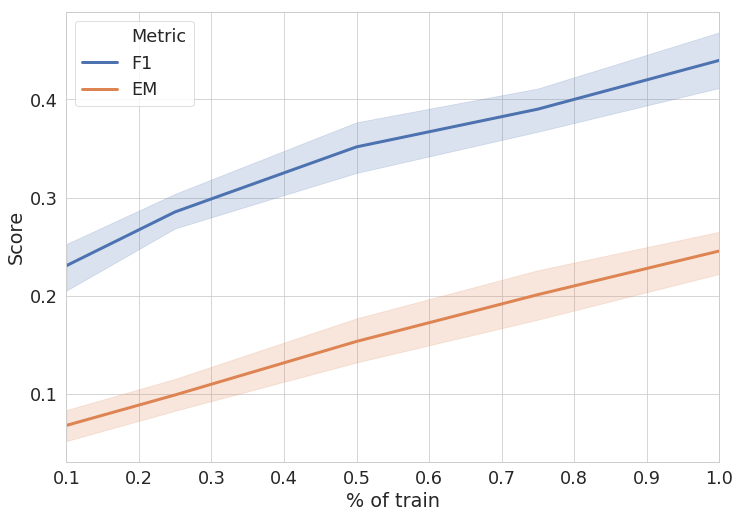

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 3})

plot_perc_f1_em(dfs["with_elmo-n:n-glove_0"])

## Respostas Únicas e Múltiplas para Treino e Dev

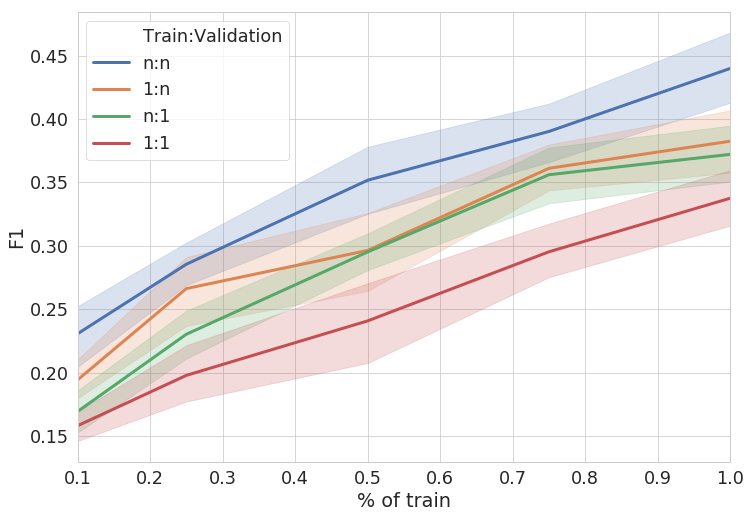

In [6]:
names = {
    "with_elmo-n:n-glove_0": "n:n",
    "with_elmo-1:n-glove_0": "1:n",
    "with_elmo-n:1-glove_0": "n:1",
    "with_elmo-1:1-glove_0": "1:1"
}

df = pd.concat([dfs[k] for k in names.keys()])

df["Train:Validation"] = df["name"].map(names)

plot_perc(df, "best_validation_f1", "Train:Validation")

## GloVE + ELMo vs ELMO vs GloVE vs Random

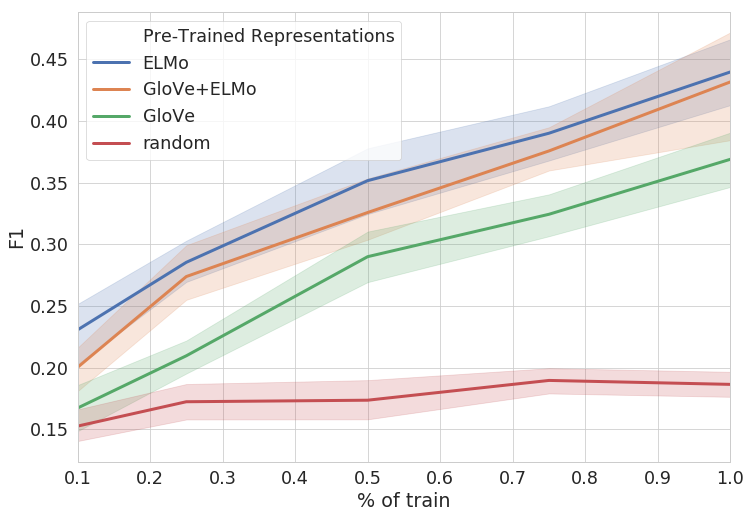

In [62]:
names = {
    "with_elmo-n:n-glove_0" : "ELMo",
    "with_elmo-n:n-glove_100" : "GloVe+ELMo",
    "no_elmo-n:n-glove_100": "GloVe",
    "no_elmo-n:n-glove_0" : "random",
}
          

df = pd.concat([dfs[k] for k in names.keys()])

df["Pre-Trained Representations"] = df["name"].map(names)

plot_perc(df, "best_validation_f1", "Pre-Trained Representations")

## F1 e EM dos modelos com 100% dos dados

In [7]:
df = pd.DataFrame({
    "ELMo": ["yes", "yes", "yes", "yes", "yes", "no", "no", "yes", "yes", "yes"],
    "GloVe": ["yes", "yes", "yes", "yes", "no", "no", "yes", "no", "no", "no"],
    "Train Answers Amount": ["n", "n", "1", "1", "n", "n", "n", "n", "1", "1"],
    "Dev Answers Amount": ["n", "1", "n", "1", "n", "n", "n", "1", "n", "1"],
    "F1": [
        dfs["with_elmo-n:n-glove_100"]['best_validation_f1'].where(dfs["with_elmo-n:n-glove_100"]['perc'] == 1.00).mean(),
        dfs["with_elmo-n:1-glove_100"]['best_validation_f1'].where(dfs["with_elmo-n:1-glove_100"]['perc'] == 1.00).mean(),
        dfs["with_elmo-1:n-glove_100"]['best_validation_f1'].where(dfs["with_elmo-1:n-glove_100"]['perc'] == 1.00).mean(),
        dfs["with_elmo-1:1-glove_100"]['best_validation_f1'].where(dfs["with_elmo-1:1-glove_100"]['perc'] == 1.00).mean(),
        dfs["with_elmo-n:n-glove_0"]['best_validation_f1'].where(dfs["with_elmo-n:n-glove_0"]['perc'] == 1.00).mean(),
        dfs["no_elmo-n:n-glove_0"]['best_validation_f1'].where(dfs["no_elmo-n:n-glove_0"]['perc'] == 1.00).mean(),
        dfs["no_elmo-n:n-glove_100"]['best_validation_f1'].where(dfs["no_elmo-n:n-glove_100"]['perc'] == 1.00).mean(),
        dfs["with_elmo-n:1-glove_0"]['best_validation_f1'].where(dfs["with_elmo-n:1-glove_0"]['perc'] == 1.00).mean(),
        dfs["with_elmo-1:n-glove_0"]['best_validation_f1'].where(dfs["with_elmo-1:n-glove_0"]['perc'] == 1.00).mean(),
        dfs["with_elmo-1:1-glove_0"]['best_validation_f1'].where(dfs["with_elmo-1:1-glove_0"]['perc'] == 1.00).mean()
    ],
    "EM": [
        dfs["with_elmo-n:n-glove_100"]['best_validation_em'].where(dfs["with_elmo-n:n-glove_100"]['perc'] == 1.00).mean(),
        dfs["with_elmo-n:1-glove_100"]['best_validation_em'].where(dfs["with_elmo-n:1-glove_100"]['perc'] == 1.00).mean(),
        dfs["with_elmo-1:n-glove_100"]['best_validation_em'].where(dfs["with_elmo-1:n-glove_100"]['perc'] == 1.00).mean(),
        dfs["with_elmo-1:1-glove_100"]['best_validation_em'].where(dfs["with_elmo-1:1-glove_100"]['perc'] == 1.00).mean(),
        dfs["with_elmo-n:n-glove_0"]['best_validation_em'].where(dfs["with_elmo-n:n-glove_0"]['perc'] == 1.00).mean(),
        dfs["no_elmo-n:n-glove_0"]['best_validation_em'].where(dfs["no_elmo-n:n-glove_0"]['perc'] == 1.00).mean(),
        dfs["no_elmo-n:n-glove_100"]['best_validation_em'].where(dfs["no_elmo-n:n-glove_100"]['perc'] == 1.00).mean(),
        dfs["with_elmo-n:1-glove_0"]['best_validation_em'].where(dfs["with_elmo-n:1-glove_0"]['perc'] == 1.00).mean(),
        dfs["with_elmo-1:n-glove_0"]['best_validation_em'].where(dfs["with_elmo-1:n-glove_0"]['perc'] == 1.00).mean(),
        dfs["with_elmo-1:1-glove_0"]['best_validation_em'].where(dfs["with_elmo-1:1-glove_0"]['perc'] == 1.00).mean()
    ],
    "stdev_F1": [
        dfs["with_elmo-n:n-glove_100"]['best_validation_f1'].where(dfs["with_elmo-n:n-glove_100"]['perc'] == 1.00).std(),
        dfs["with_elmo-n:1-glove_100"]['best_validation_f1'].where(dfs["with_elmo-n:1-glove_100"]['perc'] == 1.00).std(),
        dfs["with_elmo-1:n-glove_100"]['best_validation_f1'].where(dfs["with_elmo-1:n-glove_100"]['perc'] == 1.00).std(),
        dfs["with_elmo-1:1-glove_100"]['best_validation_f1'].where(dfs["with_elmo-1:1-glove_100"]['perc'] == 1.00).std(),
        dfs["with_elmo-n:n-glove_0"]['best_validation_f1'].where(dfs["with_elmo-n:n-glove_0"]['perc'] == 1.00).std(),
        dfs["no_elmo-n:n-glove_0"]['best_validation_f1'].where(dfs["no_elmo-n:n-glove_0"]['perc'] == 1.00).std(),
        dfs["no_elmo-n:n-glove_100"]['best_validation_f1'].where(dfs["no_elmo-n:n-glove_100"]['perc'] == 1.00).std(),
        dfs["with_elmo-n:1-glove_0"]['best_validation_f1'].where(dfs["with_elmo-n:1-glove_0"]['perc'] == 1.00).std(),
        dfs["with_elmo-1:n-glove_0"]['best_validation_f1'].where(dfs["with_elmo-1:n-glove_0"]['perc'] == 1.00).std(),
        dfs["with_elmo-1:1-glove_0"]['best_validation_f1'].where(dfs["with_elmo-1:1-glove_0"]['perc'] == 1.00).std()
    ],
    "stdev_EM": [
        dfs["with_elmo-n:n-glove_100"]['best_validation_em'].where(dfs["with_elmo-n:n-glove_100"]['perc'] == 1.00).std(),
        dfs["with_elmo-n:1-glove_100"]['best_validation_em'].where(dfs["with_elmo-n:1-glove_100"]['perc'] == 1.00).std(),
        dfs["with_elmo-1:n-glove_100"]['best_validation_em'].where(dfs["with_elmo-1:n-glove_100"]['perc'] == 1.00).std(),
        dfs["with_elmo-1:1-glove_100"]['best_validation_em'].where(dfs["with_elmo-1:1-glove_100"]['perc'] == 1.00).std(),
        dfs["with_elmo-n:n-glove_0"]['best_validation_em'].where(dfs["with_elmo-n:n-glove_0"]['perc'] == 1.00).std(),
        dfs["no_elmo-n:n-glove_0"]['best_validation_em'].where(dfs["no_elmo-n:n-glove_0"]['perc'] == 1.00).std(),
        dfs["no_elmo-n:n-glove_100"]['best_validation_em'].where(dfs["no_elmo-n:n-glove_100"]['perc'] == 1.00).std(),
        dfs["with_elmo-n:1-glove_0"]['best_validation_em'].where(dfs["with_elmo-n:1-glove_0"]['perc'] == 1.00).std(),
        dfs["with_elmo-1:n-glove_0"]['best_validation_em'].where(dfs["with_elmo-1:n-glove_0"]['perc'] == 1.00).std(),
        dfs["with_elmo-1:1-glove_0"]['best_validation_em'].where(dfs["with_elmo-1:1-glove_0"]['perc'] == 1.00).std()
    ]
}).sort_values(["F1", "EM"], ascending=False)\
    .style\
    .set_properties(**{'text-align': 'center'})\
    .hide_index()

df

ELMo,GloVe,Train Answers Amount,Dev Answers Amount,F1,EM,stdev_F1,stdev_EM
yes,no,n,n,0.439843,0.245608,0.0483289,0.0371246
yes,yes,n,n,0.431768,0.241338,0.0754166,0.056036
yes,no,1,n,0.382493,0.202222,0.0430697,0.0376978
yes,no,n,1,0.372102,0.183333,0.0376217,0.0107981
no,yes,n,n,0.369034,0.176741,0.0383009,0.0531632
yes,yes,1,n,0.364206,0.174485,0.0454005,0.0340216
yes,yes,n,1,0.349592,0.161162,0.0538445,0.0474091
yes,no,1,1,0.337559,0.164444,0.0366825,0.0326262
yes,yes,1,1,0.29921,0.125485,0.0237878,0.0204881
no,no,n,n,0.18653,0.0355728,0.016902,0.0207213
